In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [404]:
display(stud.head())
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [405]:
# Переименуем колонку 'studytime, granular', удалим дубликат
stud['studytime, granular'] = stud['studytime']
stud.drop(['studytime, granular'], inplace = True, axis = 1)

In [214]:
#Пройдёмся по столбцам. Начнём с school:
stud.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

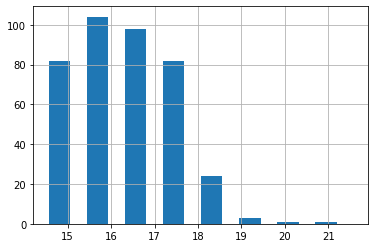

In [410]:
# Далее проверяем колонку age
stud.age.hist(bins=8,width=0.5,align='left')
stud.age.value_counts()

U    295
R     83
Name: address, dtype: int64

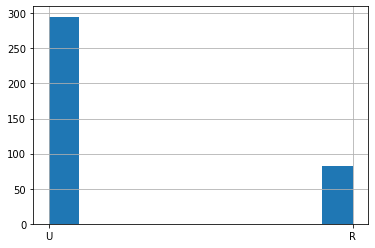

In [412]:
# Далее проверяем колонку address
stud.address.hist()
stud.address.value_counts()

In [413]:
# Проверим колонку famsize
display(stud.famsize.value_counts())

GT3    261
LE3    107
Name: famsize, dtype: int64

In [414]:
# Проверим колонку Pstatus
display(stud.Pstatus.value_counts())


T    314
A     36
Name: Pstatus, dtype: int64

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

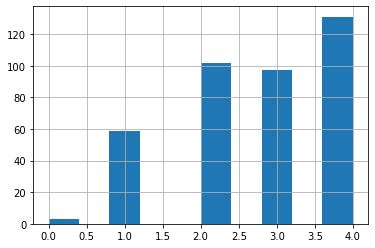

In [64]:
# Проверим колонку Medu
display(stud.Medu.value_counts())
stud.Medu.hist()

2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64

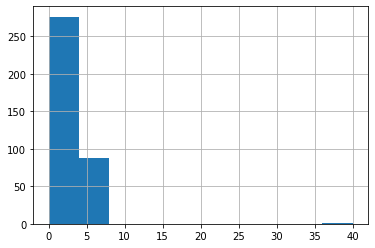

In [428]:
# Проверим колонку Fedu
display(stud.Fedu.value_counts())
stud.Fedu.hist()

In [215]:
stud[stud.Fedu>4] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


2.0    105
3.0     94
4.0     89
1.0     75
0.0      2
Name: Fedu, dtype: int64

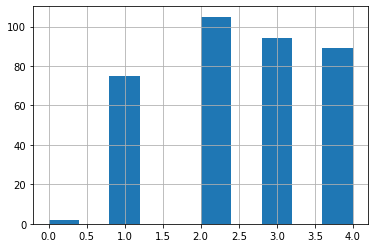

In [429]:
# В датасете одно значение больше 4, равно 40. Скорее всего, это опечатка и имелось в виду 4. Изменим это в датасете.
stud.Fedu = stud.Fedu.apply(lambda x: x/10 if x>5 else x)
display(stud.Fedu.value_counts())
stud.Fedu.hist()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

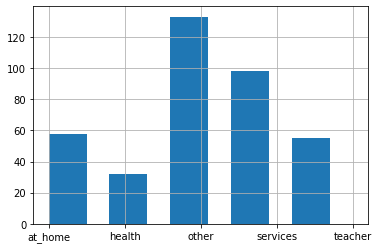

In [419]:
# Проверим колонку Mjob
display(stud.Mjob.value_counts())
stud.Mjob.hist(bins=5,width=0.5)

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

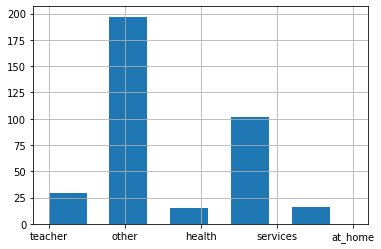

In [420]:
# Проверим колонку Fjob
display(stud.Fjob.value_counts())
stud.Fjob.hist(bins=5,width=0.5)

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

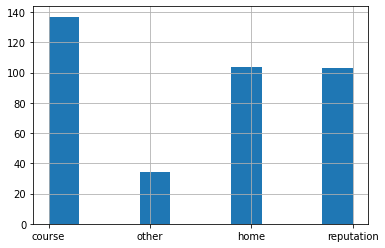

In [76]:
# Проверим колонку reason
display(stud.reason.value_counts())
stud.reason.hist()

mother    250
father     86
other      28
Name: guardian, dtype: int64

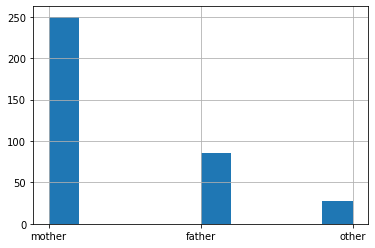

In [77]:
# Проверим колонку guardian
display(stud.guardian.value_counts())
stud.guardian.hist()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

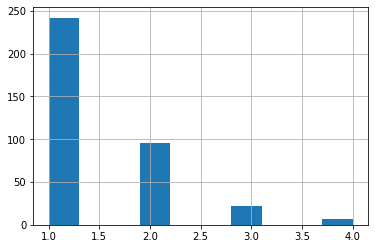

In [79]:
# Проверим колонку traveltime
display(stud.traveltime.value_counts())
stud.traveltime.hist()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

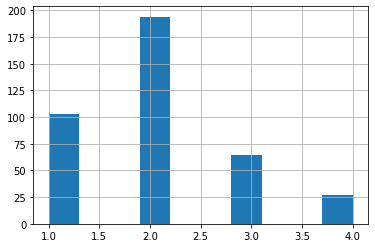

In [81]:
# Проверим колонку studytime
display(stud.studytime.value_counts())
stud.studytime.hist()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

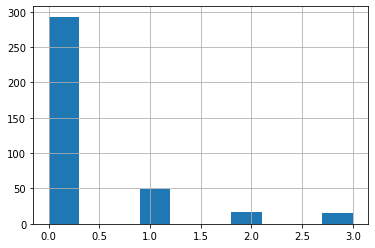

In [84]:
# Проверим колонку failures
display(stud.failures.value_counts())
stud.failures.hist()

no     335
yes     51
Name: schoolsup, dtype: int64

count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

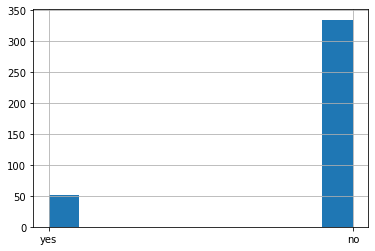

In [88]:
# Проверим колонку schoolsup
display(stud.schoolsup.value_counts())
stud.schoolsup.hist()
stud.schoolsup.describe()

yes    219
no     137
Name: famsup, dtype: int64

count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

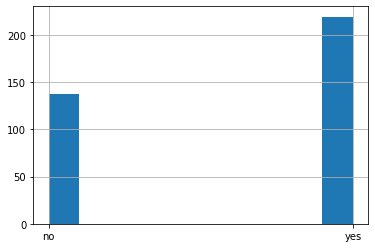

In [89]:
# Проверим колонку famsup
display(stud.famsup.value_counts())
stud.famsup.hist()
stud.famsup.describe()

no     200
yes    155
Name: paid, dtype: int64

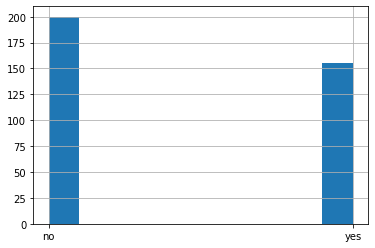

In [91]:
# Проверим колонку paid
display(stud.paid.value_counts())
stud.paid.hist()

yes    195
no     186
Name: activities, dtype: int64

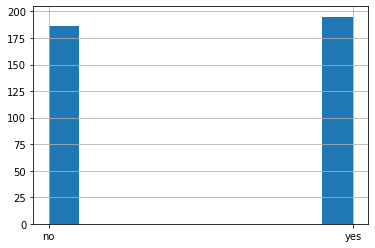

In [92]:
# Проверим колонку activities
display(stud.activities.value_counts())
stud.activities.hist()

yes    300
no      79
Name: nursery, dtype: int64

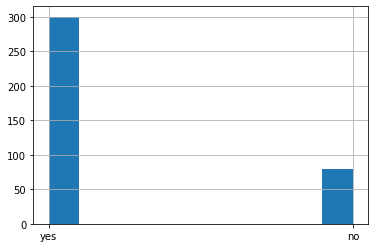

In [93]:
# Проверим колонку nursery
display(stud.nursery.value_counts())
stud.nursery.hist()

yes    356
no      19
Name: higher, dtype: int64

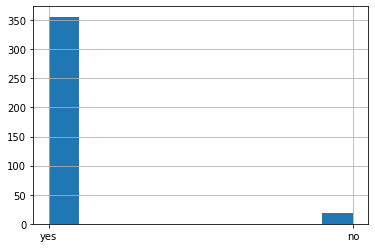

In [95]:
# Проверим колонку higher
display(stud.higher.value_counts())
stud.higher.hist()

yes    305
no      56
Name: internet, dtype: int64

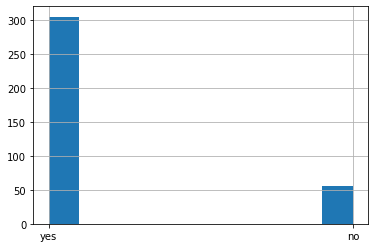

In [96]:
# Проверим колонку internet
display(stud.internet.value_counts())
stud.internet.hist()

no     240
yes    124
Name: romantic, dtype: int64

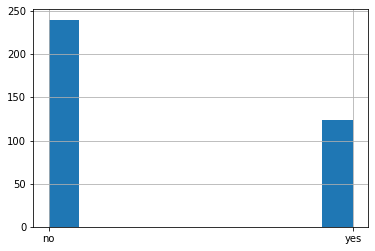

In [97]:
# Проверим колонку romantic
display(stud.romantic.value_counts())
stud.romantic.hist()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

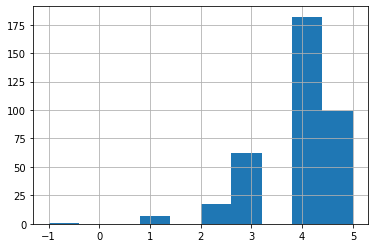

In [98]:
# Проверим колонку famrel
display(stud.famrel.value_counts())
stud.famrel.hist()

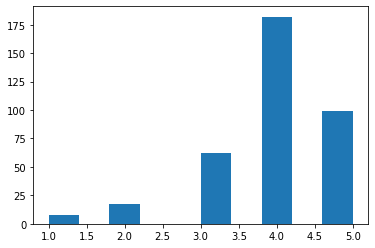

In [421]:
# В датасете есть одно значение меньше 1 (равно -1). Скорее всего, это опечатка, поэтому мы берем abs ().
stud.famrel = stud.famrel.apply(lambda x: abs(x) if x<0 else x)
stud.famrel.hist(grid = False)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

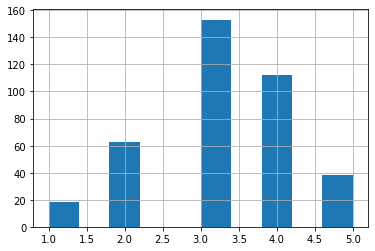

In [120]:
# Проверим колонку freetime
display(stud.freetime.value_counts())
stud.freetime.hist()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

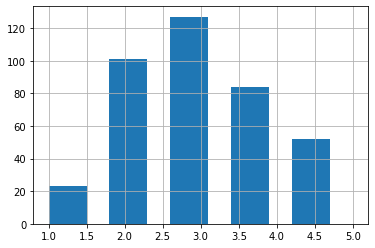

In [424]:
# Проверим колонку goout
display(stud.goout.value_counts())
stud.goout.hist(bins=5,width=0.5)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

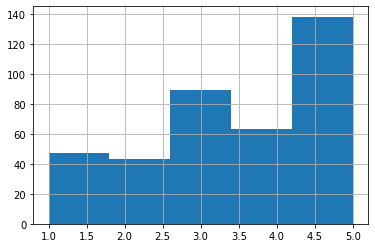

In [425]:
# Проверим колонку health
display(stud.health.value_counts())
stud.health.hist(bins=5)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

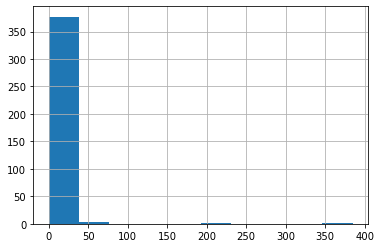

In [126]:
# Проверим колонку absences
display(stud.absences.value_counts())
stud.absences.hist()
stud.absences.describe()

In [142]:
#Напишем функцию для отсечения выбросов
def cut_edges (column):
    IQR = column.quantile(0.75) - column.quantile(0.25)
    perc25 = column.quantile(.25)
    perc75 = column.quantile(.75)
    print (
    '75% перцентиль: {}, 25% перцентиль: {}, Стандартное отклонение IQR: {}'.format(perc75,perc25,IQR),'\n',
    'Границы выбросов: [{l},{r}]'.format(l = perc25-1.5*IQR, r = perc75+1.5*IQR))
    return perc75,perc25,IQR

In [143]:
cut_edges(stud.absences)

75% перцентиль: 8.0, 25% перцентиль: 0.0, Стандартное отклонение IQR: 8.0 
 Границы выбросов: [-12.0,20.0]


(8.0, 0.0, 8.0)

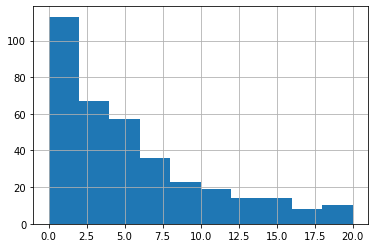

In [432]:
# Нижний перцентиль равен 0, но ниже нуля значений не может быть, поэтому за нижнюю границу берем 0.
# Следуя правилам, верхнюю границу выборки стоит сделать 0.8*1.5 = 12, однако у нас отсекаются много значений, 
# которые могут повлиять на конечную модель, например 14 , 16, 17 значений (12, 7 и 5 повторений в датасете), 
# поэтому возьмем верхнюю границу, равную 20.
stud = stud[stud.absences.between(0,20)]
stud.absences.hist()

50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

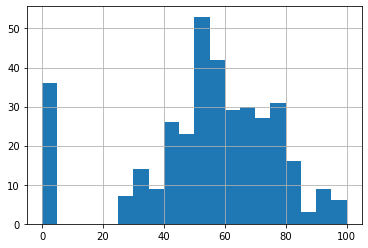

In [227]:
# Проверим колонку score
display(stud.score.value_counts())
stud.score.hist(bins=20)
stud.score.describe()

In [ ]:
# Колонка score не содержит выбросов, можно использовать весь датасет. Только нужно убрать пустые значения

In [426]:
stud.dropna(subset = ['score'],inplace=True)
stud.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    float64
 7   Fedu        365 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

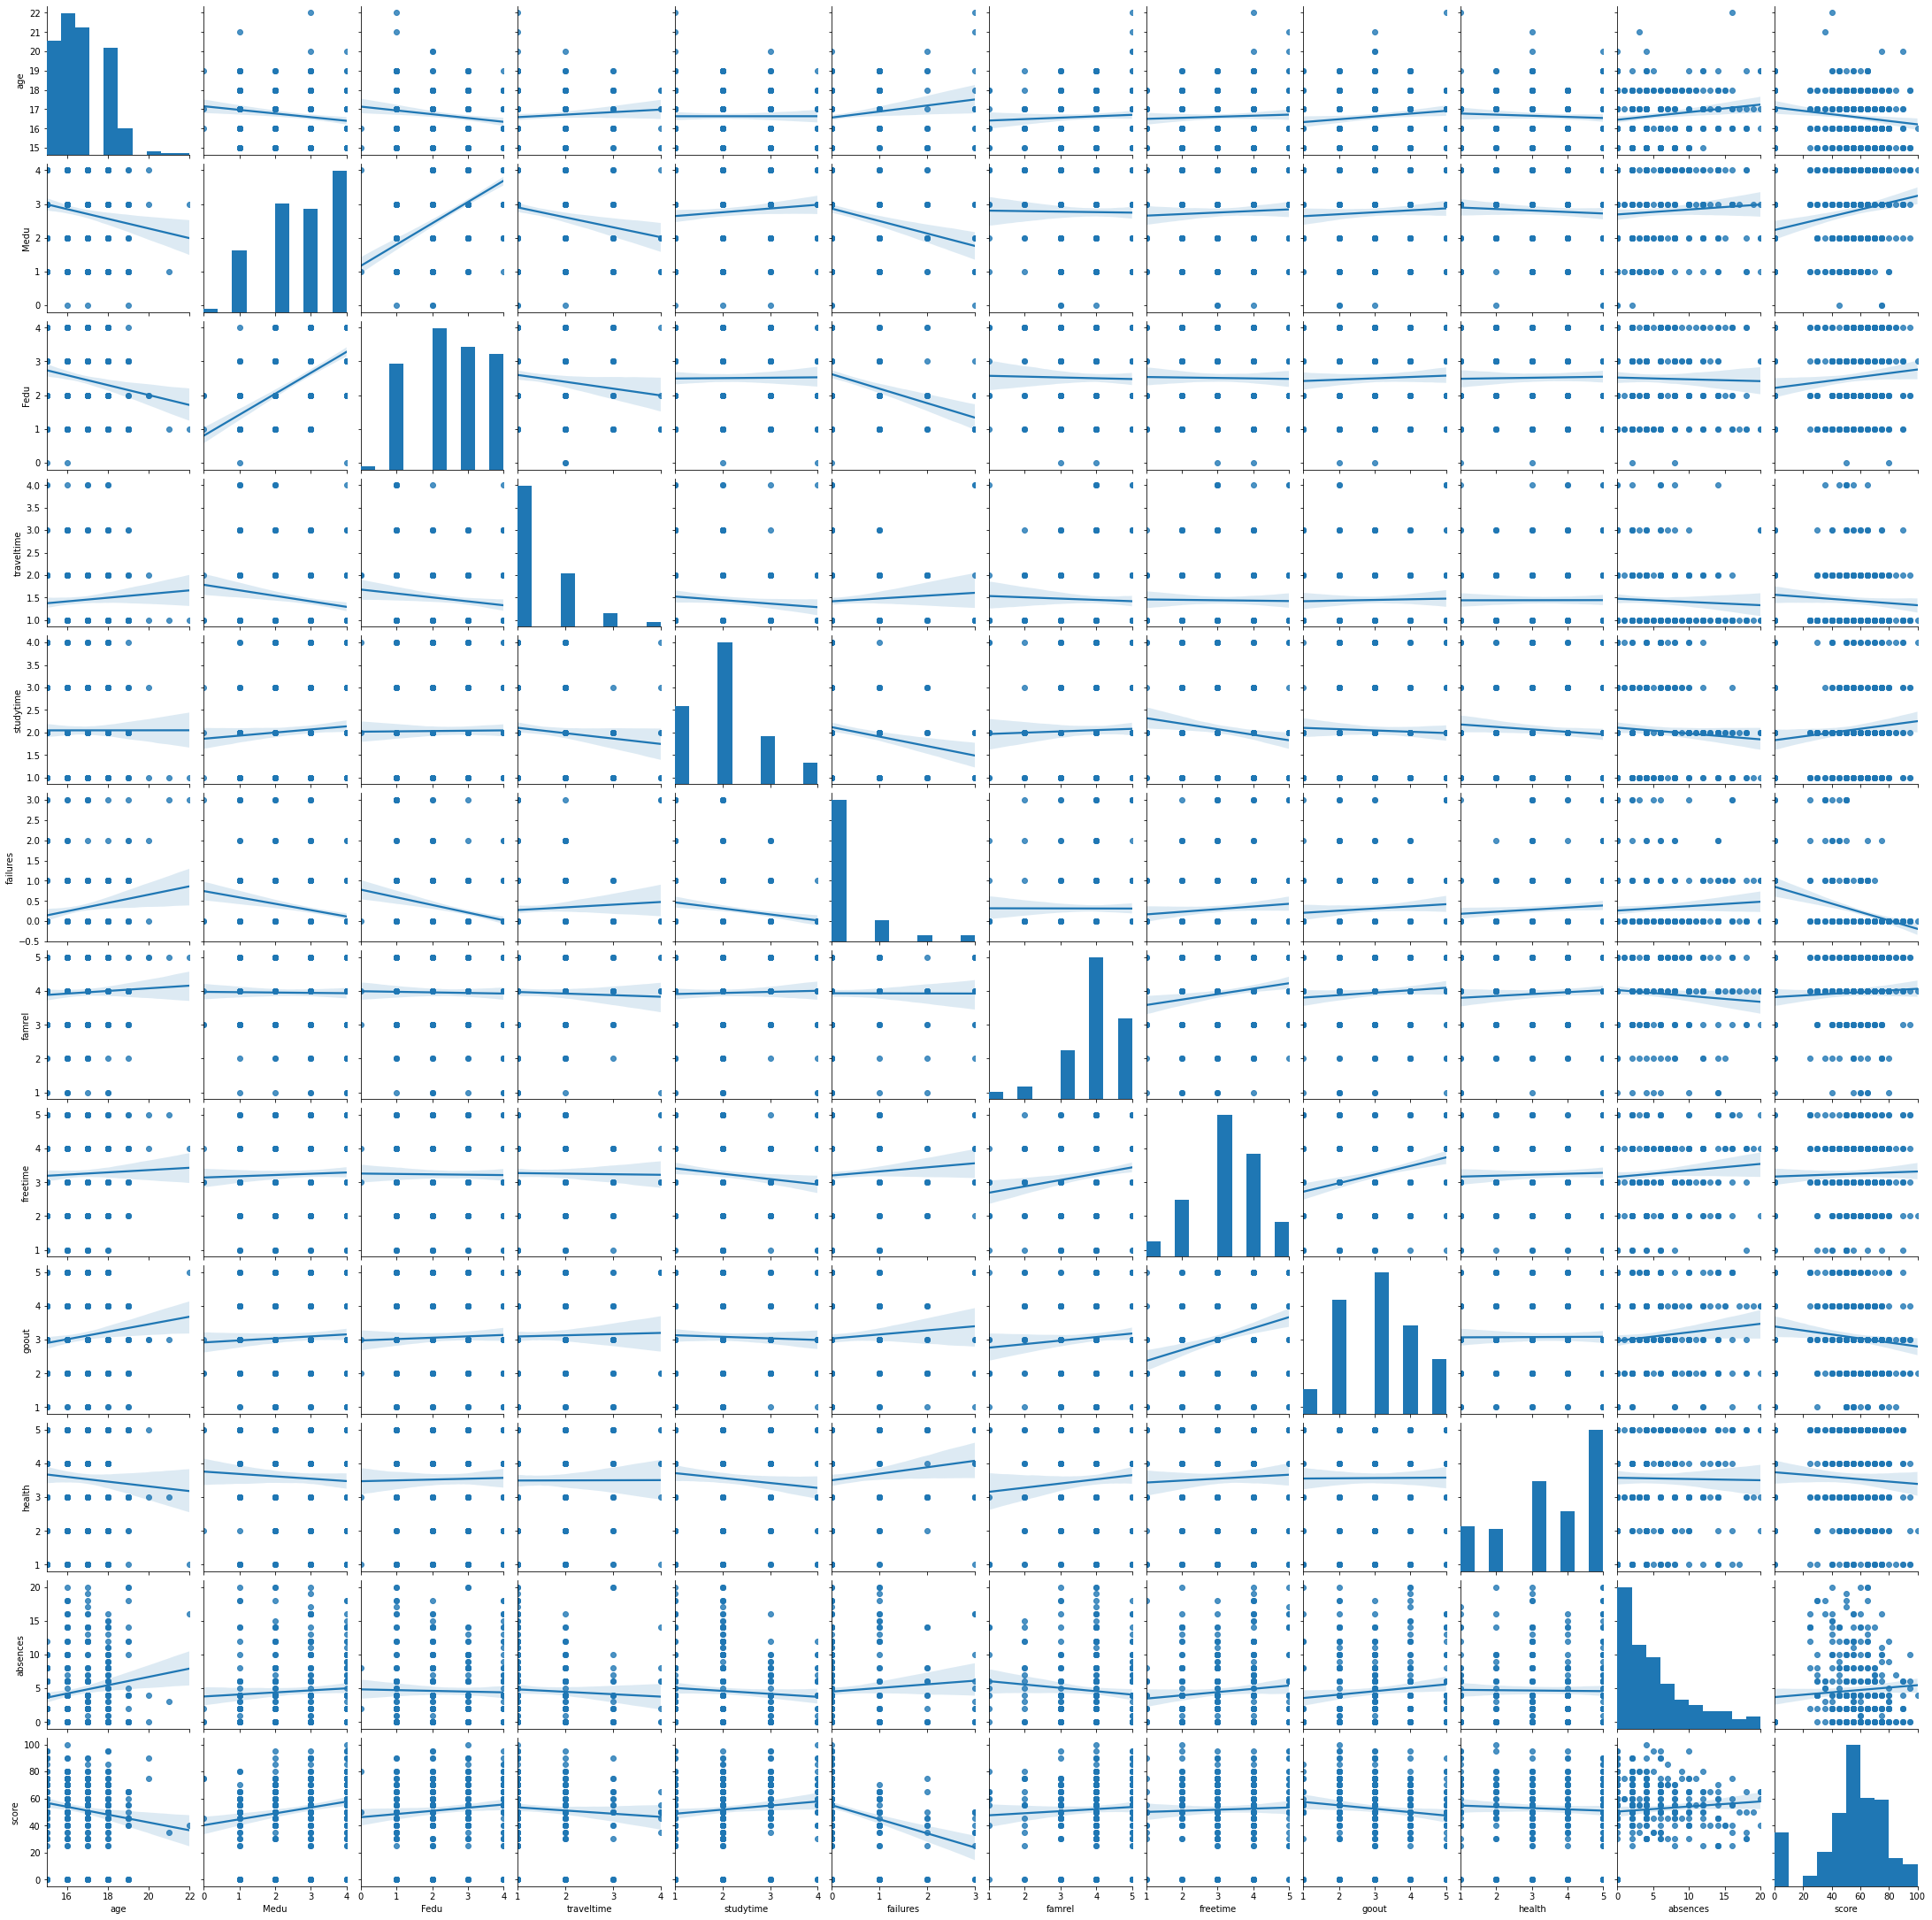

In [433]:
# Построим график зависимостей числовых значений друг от друга.

sns.pairplot(stud, kind = 'reg')


In [434]:
s_corr = stud.corr()
s_corr


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.164627,-0.170310,0.072970,0.000417,0.179170,0.053881,0.043196,0.127582,-0.064051,0.155469,-0.159306
Medu,-0.164627,1.000000,0.625902,-0.189973,0.087904,-0.240567,-0.012270,0.041438,0.058623,-0.055584,0.066439,0.210257
Fedu,-0.170310,0.625902,1.000000,-0.132867,0.009432,-0.284939,-0.020295,-0.012527,0.040273,0.019340,-0.024235,0.113379
traveltime,0.072970,-0.189973,-0.132867,1.000000,-0.097291,0.064499,-0.036739,-0.012274,0.022589,0.001935,-0.050613,-0.074045
studytime,0.000417,0.087904,0.009432,-0.097291,1.000000,-0.176952,0.030359,-0.139698,-0.036747,-0.089648,-0.075454,0.113113
failures,0.179170,-0.240567,-0.284939,0.064499,-0.176952,1.000000,-0.002008,0.088810,0.080343,0.099425,0.076537,-0.329542
famrel,0.053881,-0.012270,-0.020295,-0.036739,0.030359,-0.002008,1.000000,0.174062,0.087324,0.083251,-0.092902,0.061516
freetime,0.043196,0.041438,-0.012527,-0.012274,-0.139698,0.088810,0.174062,1.000000,0.286959,0.040573,0.096281,0.034952
goout,0.127582,0.058623,0.040273,0.022589,-0.036747,0.080343,0.087324,0.286959,1.000000,0.005389,0.113048,-0.122246
health,-0.064051,-0.055584,0.019340,0.001935,-0.089648,0.099425,0.083251,0.040573,0.005389,1.000000,-0.013156,-0.057202


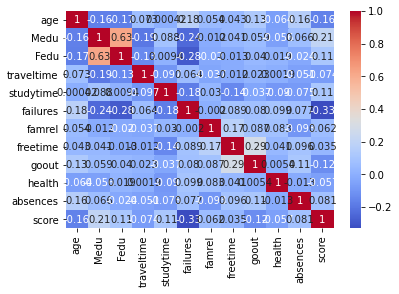

In [435]:
# Построим тепловую карту для наглядности
sns.heatmap(s_corr, annot = True, cmap = 'coolwarm')

In [358]:
abs(s_corr.score).sort_values()


freetime      0.034952
health        0.057202
famrel        0.063205
traveltime    0.074045
absences      0.081274
studytime     0.113113
Fedu          0.113379
goout         0.122246
age           0.159306
Medu          0.210257
failures      0.329542
score         1.000000
Name: score, dtype: float64

По схеме корреляции видно, что каждый параметр в разной степени влияет на итоговую успеваемость score. 

Больше всего между собой коррелируются образование отца и матери Fedu и Medu. Оставим последнее, так как оно лучше коррелируется с score.

Меньше всего на score влияют:
- наличие свободного времени после школы  freetime (обратная зависимость);
- здоровье health;
- семейные отношения famrel;
Больше всего на score влияют:
- количество внеучебных неудач failures;
- образование матери Medu;
- возраст ages (обратная зависимость).


In [272]:
#Напишем функцию, позволяющую сделать диаграммы для номинативных столбцов:

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

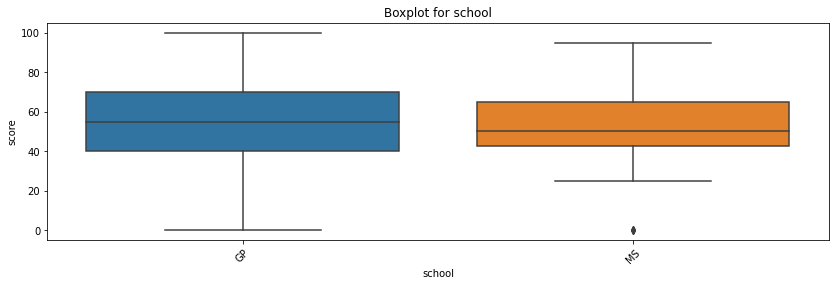

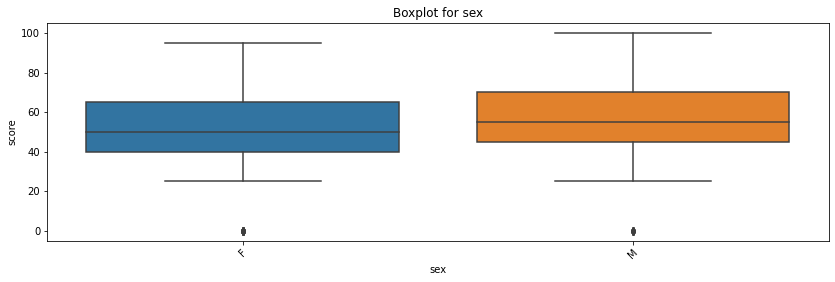

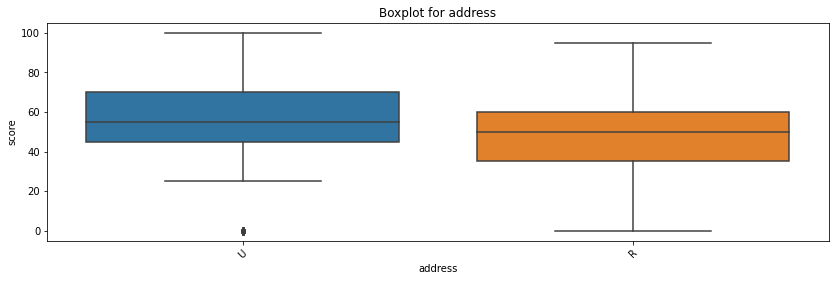

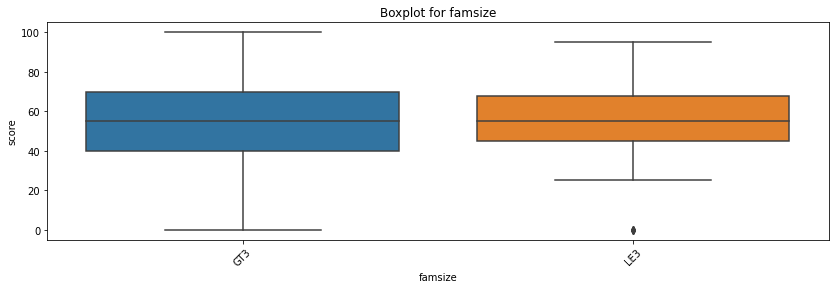

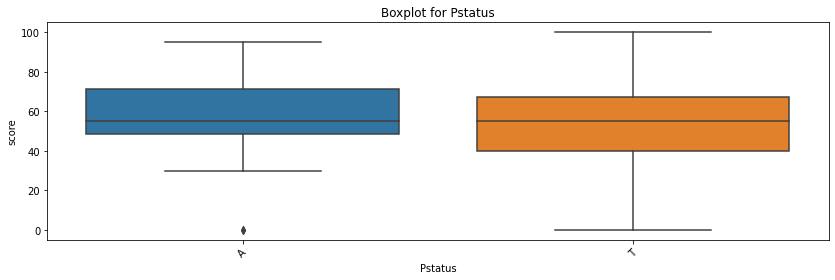

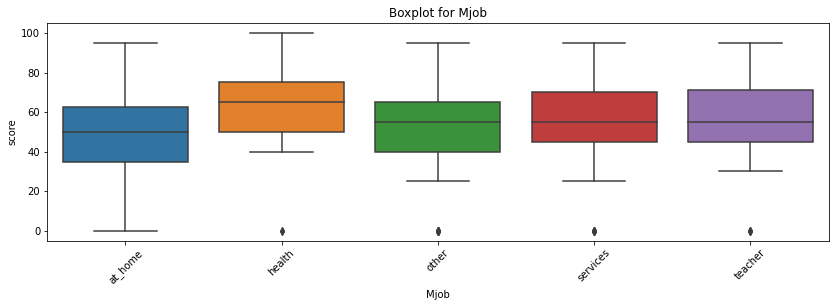

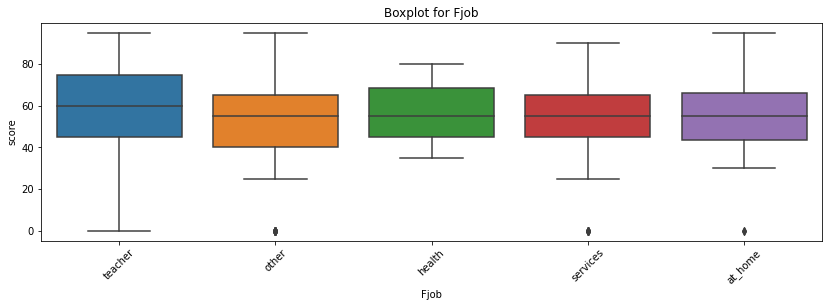

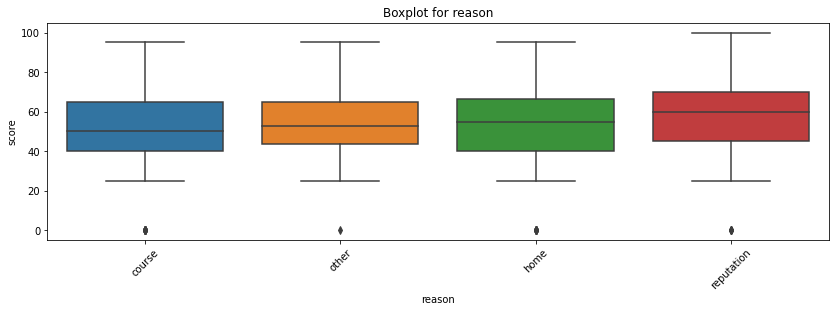

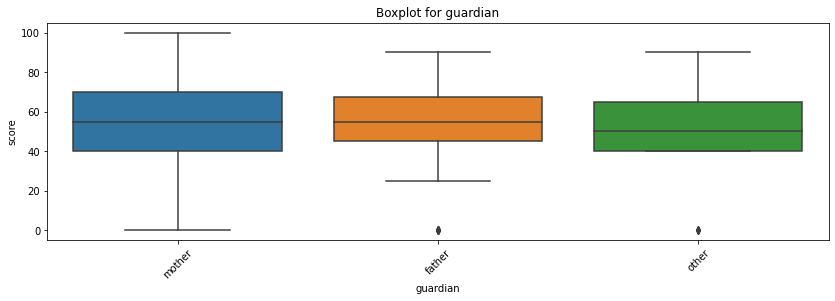

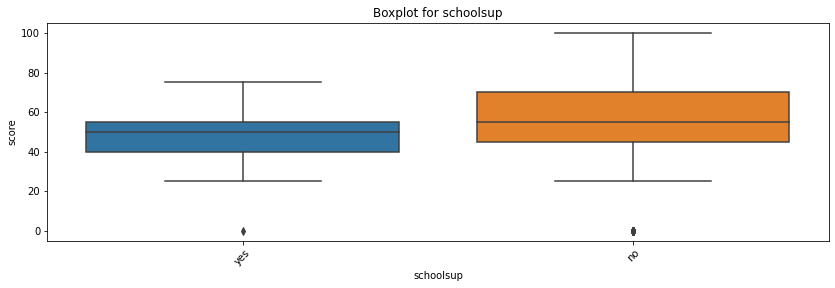

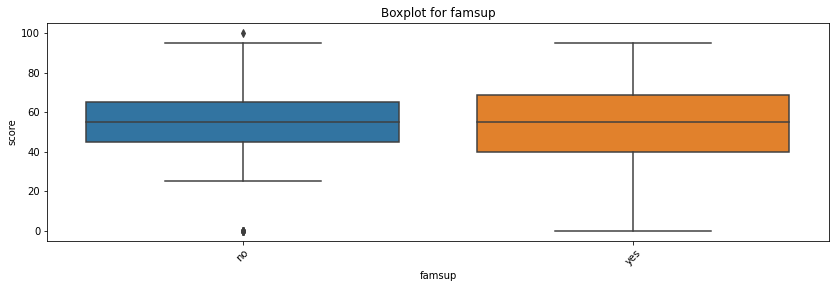

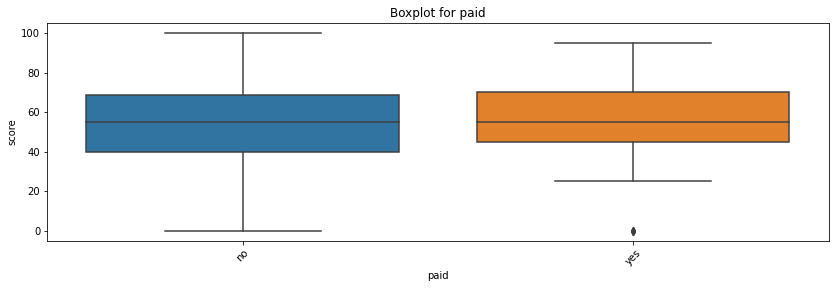

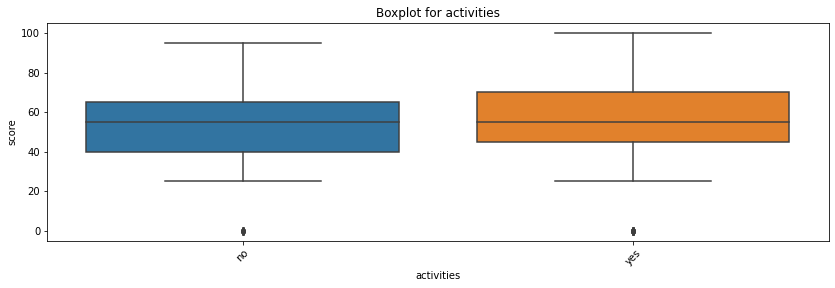

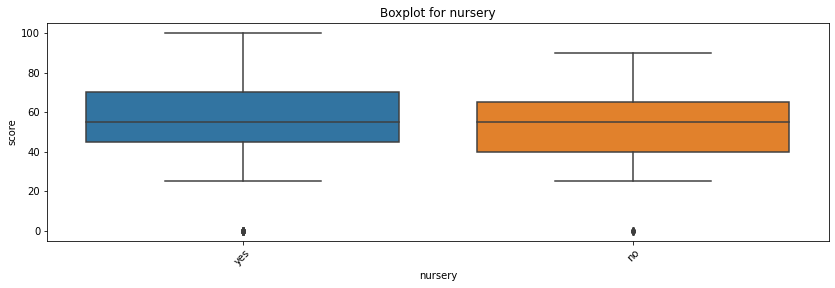

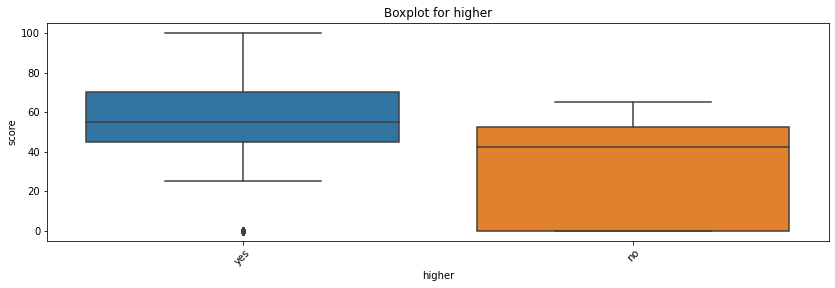

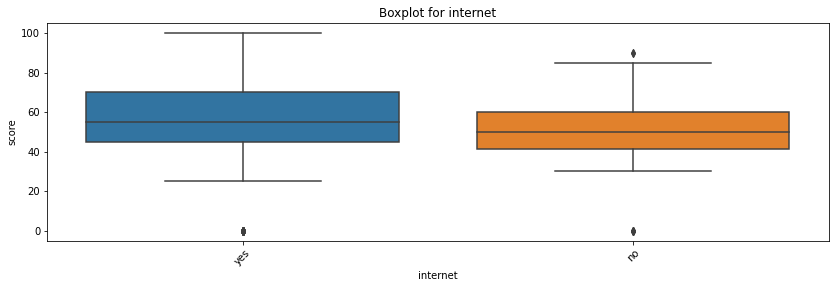

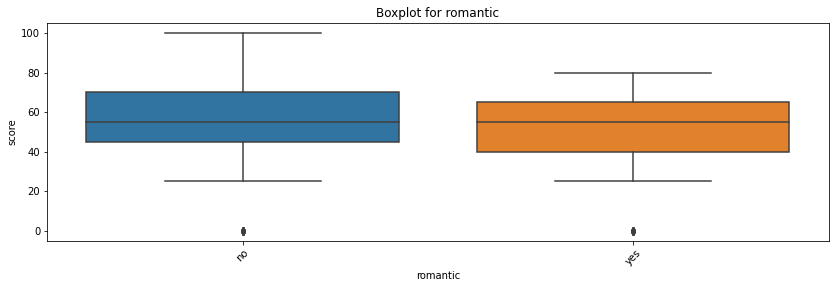

In [277]:
# Применим функцию get_boxplot к номинативным столбцам.

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob','reason','guardian','schoolsup',
            'famsup','paid','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

In [275]:
#Напишем функцию, позволяющую обнаружить статистически значимые зависимости номинативных столбцов и столбца score:

def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [278]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob','reason','guardian','schoolsup',
            'famsup','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [385]:
# Возьмем индексы колонок с цифровыми значениями для итогового датасета.
s_corr.index

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [436]:
# Создадим итоговый датасет.

stud_final = stud[['sex', 'address','Mjob', 'paid', 'higher', 'romantic','age', 'Medu', 'traveltime', 'studytime', 'failures', 'famrel','freetime', 'goout', 
      'health', 'absences', 'score']]

In [437]:
stud_final.head()

,sex,address,Mjob,paid,higher,romantic,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,F,U,at_home,no,yes,no,18,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,F,U,at_home,no,yes,no,17,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,F,U,at_home,NaN,yes,NaN,15,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,F,U,health,yes,yes,yes,15,4.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,F,U,other,yes,yes,no,16,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0


Выводы:
Как влияют числовые параметры на итоговую успеваемость score:

Больше всего влияют:
- Количество внеучебных неудач failures;
- Образование матери Medu;
- Возраст age (отрицательно). Скорее всего, тесты для старших классов сложнее и объем знаний, подлежащих проверке больше, что снижает итоговую успеваемость старшеклассников. Также они могут отвлекаться на внеучебные вещи, в том числе романтические отношения.
- Проведение времени с друзьями goout (отрицательно).

Меньше всего влияют:
- Наличие свободного времени после школы  freetime (отрицательно);
- Здоровье health;
- Семейные отношения famrel;

Как влияют номинативные параметры на итоговую успеваемость score:

- Мальчики в целом лучше учатся, чем девочки.
- Городские дети учатся лучше, чем те, которые живут за городом.
- Профессия матери влияет на итоговую успеваемость учеников, особенно если мать работает в сфере здравоохранения (высокооплачиваемую в США). Учитывая, что параметры studytime  (учеба вне школы) и и дополнительные занятия по математике (paid) имеют положительтную корреляцию с score, то можно предположить, что они нанимают хороших репетиторов для своих детей, что в свою очередь, влияет на итоговую оценку.
- Огромное положительное влияние на успеваемость учеников имеет мотивация получить высшее образование (higher).
- Отсутствие романтических отношений в школе также положительно влияет на итоговую успеваемость учеников.
